In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
import pdb

In [2]:
def energy_to_freq(energy):
    # E = h f --> f = E/h
    f = energy / const.h
    return f

def compton_edge(frequency):
    gamma = const.h * frequency / (const.m_e * const.c**2)
    T = const.h * frequency * (2 * gamma / (1 + 2*gamma))
    return T

# calculate edge for Ba133, Cs137, and Co60


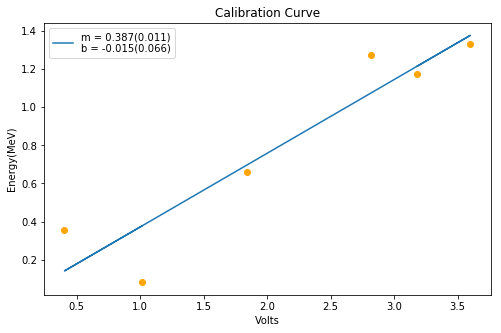

In [3]:
volts = np.array([3.180506,3.599801,2.816269,1.839212,0.4038849,1.011952])
energies = np.array([1.173,1.333,1.275,0.662,0.356,0.081])
volts_err = np.array([2.457920e-5,3.512494e-5,1.621578e-5,1.002848e-6,3.413278e-6,2.827743e-5])
gauss_widths = np.array([0.088569,0.107602,0.127853,0.076159,0.049631,0.086132])
gauss_widths_err = np.array([3.970113e-5, 7.593423e-5, 2.650205e-5, 1.697989e-6, 6.599064e-6, 4.491754e-5])

vals,vals_err = np.polyfit(volts,energies,1,cov=True)
m_err = vals_err[0][0]
b_err = vals_err[1][1]


def volts_to_energies(volts):
    energy = volts * vals[0] + vals[1]
    return energy




fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
label = "m = %0.3f(%0.3f)\nb = %0.3f(%0.3f)"%(vals[0],m_err,vals[1],b_err)
ax.errorbar(volts,energies,xerr=volts_err,color='orange',fmt='o')
ax.plot(volts,volts_to_energies(volts),label=label)
ax.set(xlabel="Volts", ylabel='Energy(MeV)',title="Calibration Curve");
ax.legend(loc=0)
fig.savefig('Calibration_Curve.png')

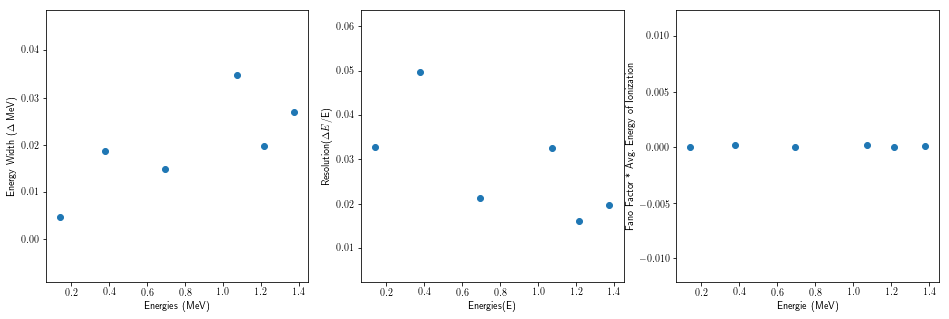

In [36]:


fig,ax = plt.subplots(1,3)
fig.set_size_inches(16,5)
energy_widths = volts_to_energies(gauss_widths)
resolution = energy_widths/(volts_to_energies(volts))
fw = (resolution/2.35)**2 * (volts_to_energies(volts))
plt.rc('text', usetex=True)
ax[0].scatter(volts_to_energies(volts),energy_widths)
ax[0].set(xlabel='Energies (MeV)', ylabel='Energy Width ($\Delta$ MeV)')
ax[1].scatter(volts_to_energies(volts), resolution)
ax[1].set(ylabel='Resolution($\Delta E$/E)', xlabel='Energies(E)')
ax[2].scatter(volts_to_energies(volts), fw)
ax[2].set(xlabel='Energie (MeV)', ylabel='Fano Factor * Avg. Energy of Ionization')
fig.savefig('energy_widths.png')

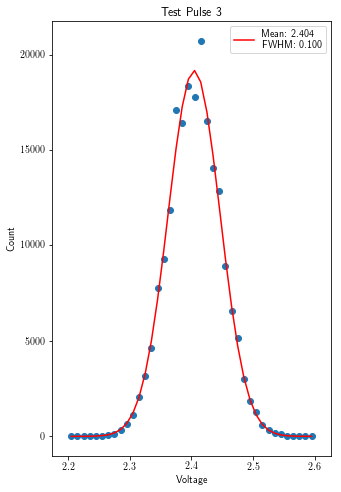

In [5]:
data1 = np.loadtxt('./data1.txt')
data2 = np.loadtxt('./data2.txt')
data3 = np.loadtxt('./data3.txt')

# x_lower, x_upper, mean_guess
data1_x_params = np.array([2.4,2.7,2])
data2_x_params = np.array([2.4,2.7,1])
data3_x_params = np.array([2.2,2.6,1])

def gaus(x,a,b,c):
    return a * np.exp(-((x-b)**2)/(2*c**2))

def data_analysis(data, data_params):
    desired_mask = np.where((data[:,0] > data_params[0]) & (data[:,0] < data_params[1]))
    desired_data = data[desired_mask]
    
    x = desired_data[:,0]
    y = desired_data[:,1]
    popt,pcov = curve_fit(gaus,x,y,p0=[1,data_params[2],1])
    perr = np.sqrt(np.diag(pcov))
    a_err, b_err, c_err = perr
    a, b, c = popt
    fwhm = 2.3548 * c
    label="Mean: %0.3f\nFWHM: %0.3f"%(b,fwhm)
    
    y_fit = gaus(x,a,b,c)
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(5,8)
    ax.scatter(x,y)
    ax.plot(x,y_fit,color='r', label=label)
    ax.legend(loc=0)
    ax.set(title='Test Pulse 3',xlabel = 'Voltage', ylabel='Count')
    fig.savefig('test_pulse3.png')
    
data_analysis(data3,data3_x_params)    

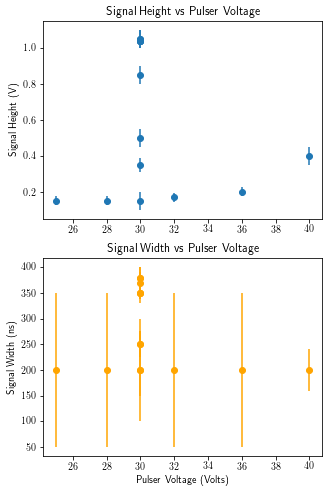

In [22]:
# vary_param_data
pulse_width = np.array([30,30,30,30,30,30,35,40,45,50,50,50,50,50,50]) # ns
dc_voltage = np.array([25,28,32,36,40,30,30,30,30,30,30,30,30,30,30]) # V
pulse_height = np.array([3,3,3,3,3,3,3,3,3,3,3.2,3.4,3.6,3.8,4]) # V
signal_width = np.array([200,200,200,200,200,200,200,250,250,350,350,380,380,350,370])
signal_width_unc = np.array([150,150,150,150,40,100,50,25,25,12.5,12.5,20,20,20,20])
signal_height = np.array([0.15,0.15,0.17,0.2,0.4,0.15,0.35,0.5,0.850,1.05,1.05,1.04,1.04,1.04,1.04])
signal_height_unc = np.array([0.025,0.025,0.025,0.025,0.05,0.05,0.04,0.05,0.05,0.05,0.05,0.02,0.02,0.02,0.02])

fig,ax = plt.subplots(2,1)
fig.set_size_inches(5,8)

ax[0].errorbar(dc_voltage, signal_height,yerr = signal_height_unc,fmt='o')
ax[0].set(ylabel='Signal Height (V)', title='Signal Height vs Pulser Voltage')
ax[1].errorbar(dc_voltage, signal_width,yerr= signal_width_unc, fmt='o',color='orange')
ax[1].set(ylabel='Signal Width (ns)', xlabel='Pulser Voltage (Volts)', title='Signal Width vs Pulser Voltage');
fig.savefig("pulser_volt_effects.png")

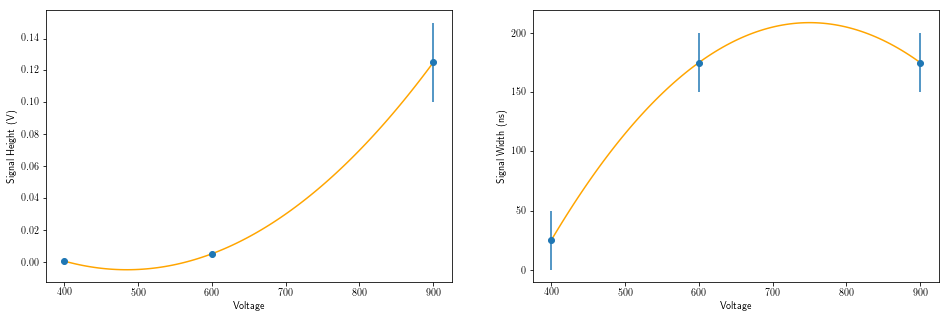

In [51]:
var_voltage = np.array([400, 600, 900]) #V
signal_width = np.array([25, 175,175]) #ns
signal_width_unc = np.array([25,25,25])
signal_height = np.array([0.4e-3,5e-3,125e-3]) #V
signal_height_unc = np.array([0.4e-3,1e-3,25e-3])


wvals = np.polyfit(var_voltage,signal_width,2)


hvals = np.polyfit(var_voltage,signal_height,2)

def linear_fit(x, fit_parms):
    a,b,c = fit_parms
    y = a*x**2 + b*x + c
    return y

x_fit = np.linspace(min(var_voltage),max(var_voltage),100)
w_fit = linear_fit(x_fit,wvals)
h_fit = linear_fit(x_fit,hvals)

fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,5)

ax[0].errorbar(var_voltage,signal_height,yerr=signal_height_unc,fmt='o')
ax[0].plot(x_fit,h_fit,color='orange')
ax[0].set(xlabel="Voltage", ylabel='Signal Height (V)')

ax[1].errorbar(var_voltage,signal_width,yerr=signal_width_unc,fmt='o')
ax[1].plot(x_fit,w_fit,color='orange')
ax[1].set(xlabel="Voltage", ylabel='Signal Width (ns)');

fig.savefig('Volt_fit.png');

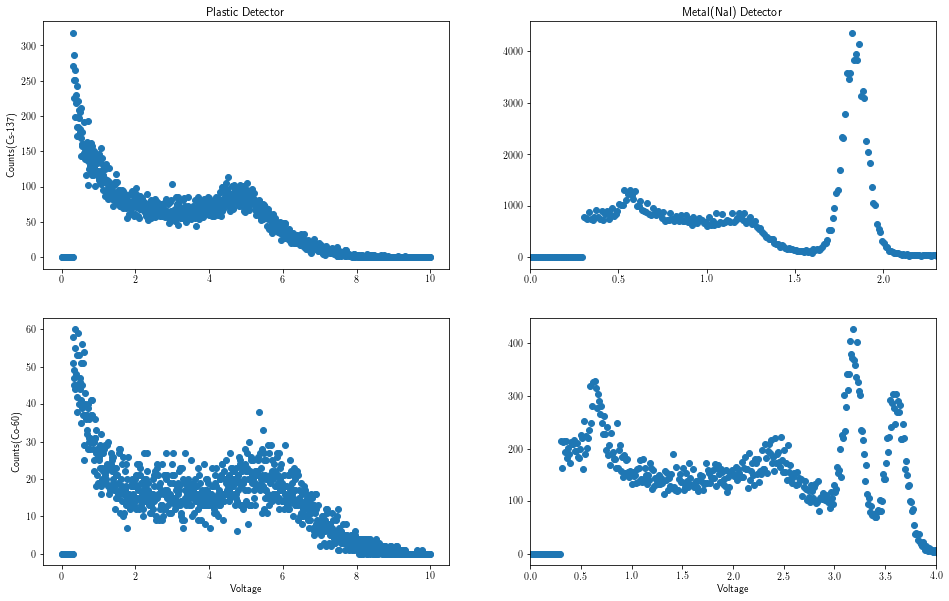

In [64]:
plastic_cs137_data = np.loadtxt('./spec_plast_cs137.txt')
plastic_co60_data = np.loadtxt('./spec_plast_co60.txt')
metal_cs137_data = np.loadtxt('./spect_metal_cs137.txt')
metal_co60_data = np.loadtxt('./spect_metal_co60.txt')
#pdb.set_trace()


fig,ax = plt.subplots(2,2)
fig.set_size_inches(16,10)

ax[0,0].set(title='Plastic Detector',ylabel='Counts(Cs-137)')
ax[0,0].scatter(plastic_cs137_data[:,0],plastic_cs137_data[:,1])
ax[1,0].set(ylabel='Counts(Co-60)', xlabel='Voltage')
ax[1,0].scatter(plastic_co60_data[:,0], plastic_co60_data[:,1])

ax[0,1].scatter(metal_cs137_data[:,0],metal_cs137_data[:,1],)
ax[1,1].scatter(metal_co60_data[:,0], metal_co60_data[:,1])
ax[0,1].set(xlim=(0,2.3))
ax[1,1].set(xlabel='Voltage',xlim=(0,4))

ax[0,1].set(title='Metal(NaI) Detector');
fig.savefig('comp_metal_plastic.png')

In [76]:
def metal_analysis():
    cs137_data = np.loadtxt('./spect_metal_cs137.txt')
    co60_data = np.loadtxt('./spect_metal_co60.txt')
    ba133_data = np.loadtxt('./spect_metal_ba133.txt')
    na22_data = np.loadtxt('./spect_metal_na22.txt')
    
    
    fig,ax = plt.subplots(2,2)
    fig.set_size_inches(16,10)
    ax[0,0].scatter(cs137_data[:,0],cs137_data[:,1])
    ax[0,0].set(title='Cs137',xlim=(0,2.3))
    ax[1,0].scatter(co60_data[:,0],co60_data[:,1])
    ax[1,0].set(title='Co60',xlim=(0,4))
    ax[0,1].scatter(ba133_data[:,0],ba133_data[:,1])
    ax[0,1].set(title='Ba133', xlim=(0,5))
    ax[1,1].scatter(na22_data[:,0], na22_data[:,1])
    ax[1,1].set(title='Na22', xlim=(0,8))



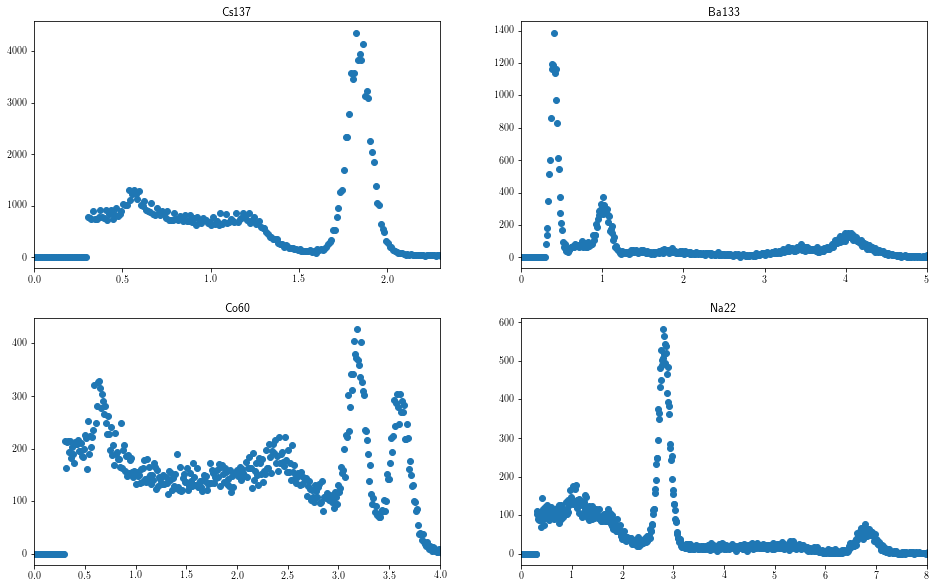

In [77]:
metal_analysis()